# Polynomial Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [4]:
from sklearn.preprocessing import PolynomialFeatures
def polynomial_regression(degree, x, y, single_or_not = True, spred = [[]]):
    poly_reg = PolynomialFeatures(degree = degree)
    x_poly = poly_reg.fit_transform(x)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(x_poly, y)
    if (single_or_not == True):
        plt.scatter(x, y, color = "red")
        plt.plot(x, lin_reg_2.predict(x_poly), color = "blue")
        plt.title("Truth or Bluff (Linear Regression)")
        plt.xlabel("Position Level")
        plt.ylabel("Salary")
        plt.show()
    else:
        print(lin_reg_2.predict(poly_reg.fit_transform(spred)))

## Visualising the Linear Regression results

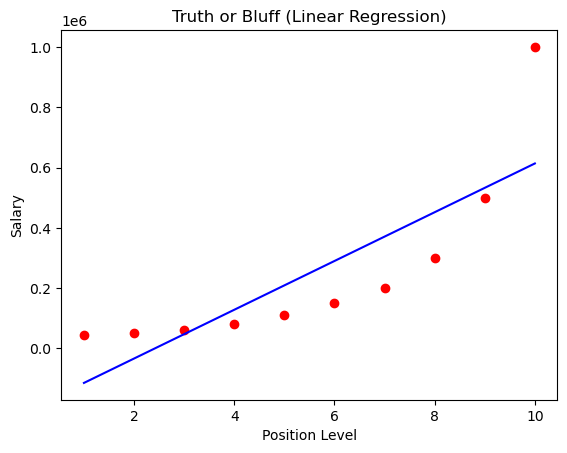

In [5]:
plt.scatter(x, y, color = "red")
plt.plot(x, lin_reg.predict(x), color = "blue")
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()

## Visualising the Polynomial Regression results

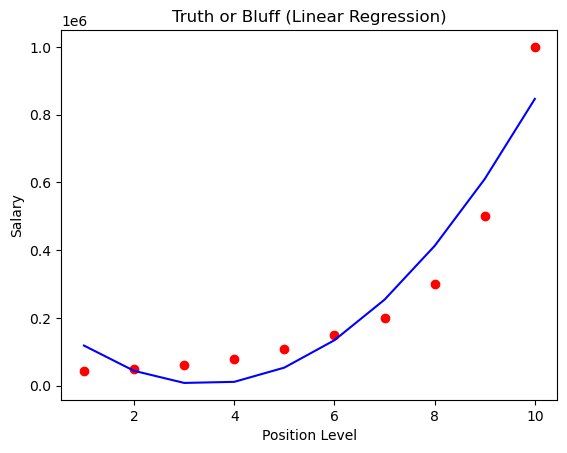

In [6]:
polynomial_regression(2, x, y)

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

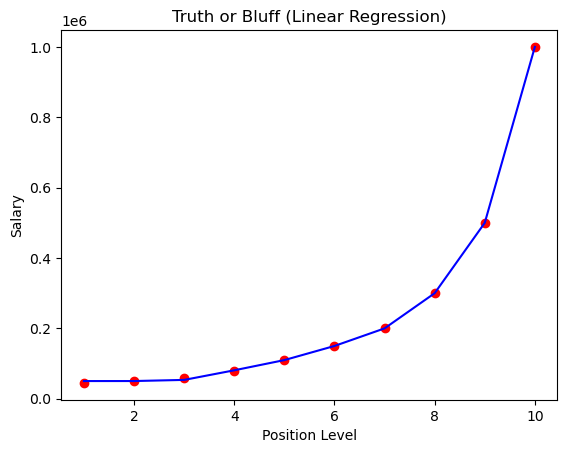

In [7]:
polynomial_regression(20, x, y)

## Predicting a new result with Linear Regression

In [8]:
print(lin_reg.predict([[12]]))

[775212.12121212]


## Predicting a new result with Polynomial Regression

In [9]:
polynomial_regression(2, x, y, False, [[12]])

[1435893.93939394]
